In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc

In [2]:
url="https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv"
diabetes_data = pd.read_csv(url)

In [3]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# feature and target
X_data = diabetes_data.iloc[:, 0:-1]
y_target = diabetes_data.iloc[:, -1]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_data,
                                                    y_target,
                                                    test_size=0.2,
                                                    random_state=4)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [6]:
# SVM 
model_svc = SVC(kernel='poly', random_state=4)
model_svc.fit(X_train, y_train)
y_pred_svm = model_svc.decision_function(X_test)

svm_fpr, svm_tpr, threshold = roc_curve(y_test, y_pred_svm)
svm_auc = auc(svm_fpr, svm_tpr)
svm_percentage = svm_auc*100

In [7]:
# logistic
model_logistic = LogisticRegression()
model_logistic.fit(X_train, y_train)
y_pred_logistic = model_logistic.decision_function(X_test)

logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, y_pred_logistic)
logistic_auc = auc(logistic_fpr, logistic_tpr)
logistic_pecentage = logistic_auc*100

In [8]:
# randomforest
model_rfc = RandomForestClassifier(n_estimators=10, random_state=42)
model_rfc.fit(X_train, y_train)
y_pred_rfc = model_rfc.predict(X_test)

rfc_fpr, rfc_tpr, threshold = roc_curve(y_test, y_pred_rfc)
rfc_auc = auc(rfc_fpr, rfc_tpr)
rfc_percentage = rfc_auc*100

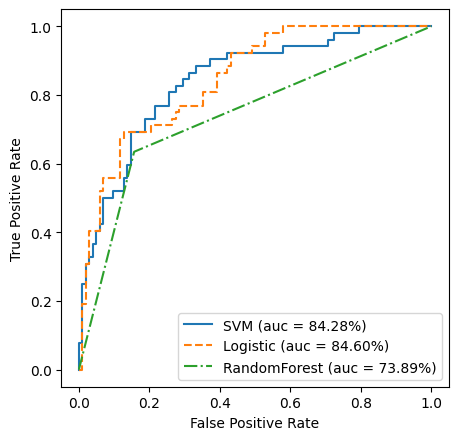

In [9]:
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(svm_fpr, svm_tpr, linestyle='-',
         label="SVM (auc = %0.2f%%)" % svm_percentage)
plt.plot(logistic_fpr, logistic_tpr, linestyle='--',
         label="Logistic (auc = %0.2f%%)" % logistic_pecentage)
plt.plot(rfc_fpr, rfc_tpr, linestyle='-.',
         label="RandomForest (auc = %0.2f%%)" % rfc_percentage)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend();